# Genetic algorithms

Genetic Algorithm (GA) for Optimization 🚀

A Genetic Algorithm (GA) is a heuristic search and optimization technique inspired by natural selection. It mimics evolution by iteratively selecting, combining, and mutating candidate solutions to find the best one.

🔹 How a Genetic Algorithm Works

1️⃣ Initialization:

* Generate a random population of solutions (chromosomes).

2️⃣ Evaluation (Fitness Function):

* Compute how “good” each solution is using a fitness function.

3️⃣ Selection:

* Choose the best solutions to pass their genes to the next generation.

4️⃣ Crossover (Recombination):

* Mix genes from two parent solutions to create new offspring.

5️⃣ Mutation:

* Introduce small random changes to maintain diversity.

6️⃣ Repeat:

* Iterate until a stopping condition is met (e.g., max generations or fitness threshold).

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from geneticalgorithm import geneticalgorithm as ga

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The fitness function trains a model using a subset of selected features and returns the accuracy as the objective to maximize.

In [4]:
def fitness_function(individual):
    """ 
    Genetic Algorithm Fitness Function 
    - individual: binary array (1 = feature selected, 0 = not selected)
    """
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]

    # If no features are selected, return a bad fitness score
    if len(selected_features) == 0:
        return 0  # Minimize error (maximize accuracy)

    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    # Train classifier
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Return negative error (since GA minimizes the objective function)
    return -accuracy_score(y_test, y_pred)

In [5]:
# set up GA params

# Number of features
num_features = X.shape[1]

# Define GA parameters
algorithm_params = {
    'max_num_iteration': 100,  # Number of generations
    'population_size': 20,  # Number of individuals in each generation
    'mutation_probability': 0.2,  # Chance of mutation
    'elit_ratio': 0.1,  # Percentage of best individuals retained
    'crossover_probability': 0.5,  # Probability of crossover
    'parents_portion': 0.3,  # Portion of population that will be parents
    'crossover_type': 'uniform',  # Crossover method
    'max_iteration_without_improv': 10  # Stop early if no improvement
}

# Define GA model
model = ga(
    function=fitness_function,  
    dimension=num_features,  
    variable_type='bool',  # Binary selection (1 = use feature, 0 = ignore)
    algorithm_parameters=algorithm_params
)

 The best solution found:                                                                           
 [1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0.]

 Objective function:
 -0.9912280701754386


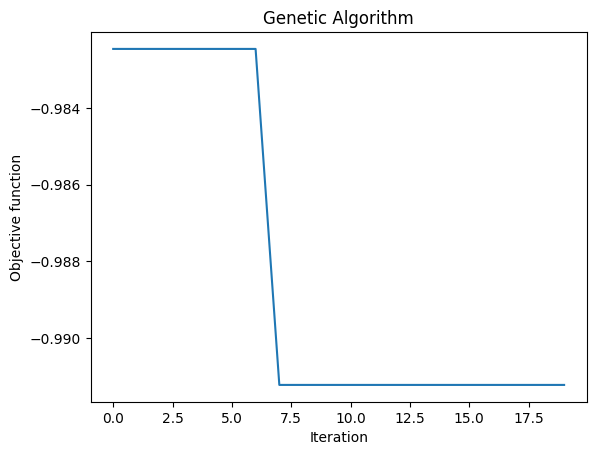

In [6]:
# Run the optimization
model.run()

# Get the best solution
best_solution = model.output_dict['variable']
selected_features = [X.columns[i] for i in range(num_features) if best_solution[i] == 1]

print(f"Selected Features: {selected_features}")

# Fraud dataset

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from geneticalgorithm import geneticalgorithm as ga
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

# Load dataset (Credit Card Fraud Detection from OpenML)
df = fetch_openml(name="creditcard", version=1, as_frame=True).frame

# Standardize 'Amount' feature
df["Amount"] = StandardScaler().fit_transform(df[["Amount"]])

# Extract features and target variable
X = df.drop(columns=["Class"])  # Remove 'Time' and target 'Class'
y = df["Class"]  # 1 = Fraud, 0 = Non-Fraud

# Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

print(f"Dataset shape after resampling: {X_resampled.shape}")


Dataset shape after resampling: (568630, 29)


In [52]:
# fitness function using ML model

def fitness_function(individual):
    """ Genetic Algorithm Fitness Function for Fraud Detection """
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]

    # If no features are selected, return a poor fitness score
    if len(selected_features) == 0:
        return 0
    
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]

    # Train model
    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    # Evaluate using F1-score (important for imbalanced fraud data)
    return -f1_score(y_test, y_pred)  # GA minimizes this, so we negate it

In [53]:
# Number of features
num_features = X.shape[1]

# Define GA parameters
algorithm_params = {
    'max_num_iteration': 50,  # Generations
    'population_size': 20,  # Population size
    'mutation_probability': 0.2,  # Mutation probability
    'elit_ratio': 0.1,  # Best individuals retained
    'crossover_probability': 0.5,  # Crossover probability
    'parents_portion': 0.3,  # Portion of population as parents
    'crossover_type': 'uniform',  # Crossover method
    'max_iteration_without_improv': 10  # Stop early if no improvement
}

# Define GA model
model = ga(
    function=fitness_function,
    dimension=num_features,
    variable_type='bool',  # Binary: 1 = feature selected, 0 = not selected
    algorithm_parameters=algorithm_params
)

# Run GA
model.run()

# Get the best feature subset
best_solution = model.output_dict['variable']
selected_features = [X.columns[i] for i in range(num_features) if best_solution[i] == 1]

print(f"Selected Features: {selected_features}")

given function is not applicable


AssertionError: After 10.0 seconds delay func_timeout: the given function does not provide any output

In [54]:
# fitness function - maximize fraud detection; impose constraint on FPR
# assumes >= for all thresholds - not necessarily the case 

def fitness_function(individual):
    """ 
    Genetic Algorithm Fitness Function (Maximizes Fraud Detection) 
    - Optimizes feature thresholds for classification
    - Constrains False Positive Rate (FPR)
    """
    
    thresholds = np.array(individual)  # Thresholds for each feature
    predictions = (X_train.values >= thresholds).astype(int)  # Apply thresholding
    fraud_scores = predictions.sum(axis=1)  # Sum rule (higher score = more fraudulent)

    # Define a threshold to classify transactions as fraud (e.g., if 3+ features exceed thresholds)
    fraud_threshold = 3
    y_pred = (fraud_scores >= fraud_threshold).astype(int)

    # Compute True Positives (TP), False Positives (FP), and False Negatives (FN)
    TP = np.sum((y_pred == 1) & (y_train == 1))
    FP = np.sum((y_pred == 1) & (y_train == 0))
    FN = np.sum((y_pred == 0) & (y_train == 1))

    # Compute True Positive Rate (TPR) = TP / (TP + FN)
    TPR = TP / (TP + FN + 1e-6)  # Avoid division by zero

    # Compute False Positive Rate (FPR) = FP / (FP + TN)
    TN = np.sum((y_pred == 0) & (y_train == 0))
    FPR = FP / (FP + TN + 1e-6)  

    # Set FPR constraint (e.g., penalize solutions where FPR > 5%)
    FPR_constraint = 0.05
    penalty = 1000 if FPR > FPR_constraint else 0  # Add a large penalty if FPR is too high

    return -(TPR - penalty)  # Maximize TPR while avoiding high FPR

 The best solution found:                                                                           
 [0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 1. 0.]

 Objective function:
 999.0000000000044


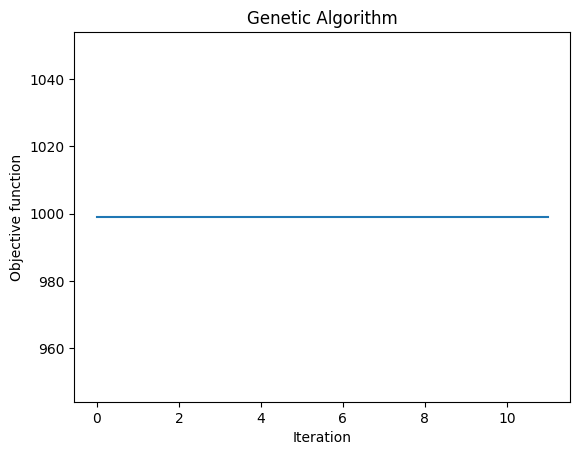


Selected Features: ['V2', 'V3', 'V4', 'V8', 'V9', 'V12', 'V13', 'V20', 'V22', 'V23', 'V24', 'V25', 'V27', 'V28']


In [55]:
# Number of features
num_features = X.shape[1]

# Define GA parameters
algorithm_params = {
    'max_num_iteration': 50,  # Generations
    'population_size': 20,  # Population size
    'mutation_probability': 0.2,  # Mutation probability
    'elit_ratio': 0.1,  # Best individuals retained
    'crossover_probability': 0.5,  # Crossover probability
    'parents_portion': 0.3,  # Portion of population as parents
    'crossover_type': 'uniform',  # Crossover method
    'max_iteration_without_improv': 10  # Stop early if no improvement
}

# Define GA model
model = ga(
    function=fitness_function,
    dimension=num_features,
    variable_type='bool',  # Binary: 1 = feature selected, 0 = not selected
    algorithm_parameters=algorithm_params
)

# Run GA
model.run()

# Get the best feature subset
best_solution = model.output_dict['variable']
selected_features = [X.columns[i] for i in range(num_features) if best_solution[i] == 1]

print(f"\nSelected Features: {selected_features}")

### Example 3 - feature cutoffs, maximize detection with constraint on FPR

In [56]:
from sklearn.metrics import confusion_matrix
import numpy as np

def fitness_function(thresholds):
    # Create rules based on thresholds
    # Each feature in X_train corresponds to a threshold
    # If a feature's value exceeds the threshold, mark as fraud (1), otherwise no fraud (0)
    
    # Initialize the predictions vector
    y_pred = np.zeros_like(y_train)
    
    # Iterate over each feature and apply the threshold rule
    for i in range(len(thresholds)):
        feature_values = X_train.iloc[:, i]
        y_pred += (feature_values > thresholds[i])  # Increment fraud prediction if feature exceeds threshold
    
    # Apply majority rule: if more than half of the features exceed the threshold, classify as fraud
    y_pred = (y_pred > (len(thresholds) / 2)).astype(int)  # Majority rule for classifying fraud (1) or not (0)
    
    # Calculate confusion matrix: TN, FP, FN, TP
    tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
    
    # Calculate precision, recall, and false positive rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    # Fitness function: Maximize recall (fraud detection) and precision, minimize FPR
    if fpr > 0.2:  # Example FPR constraint (adjust as needed)
        return 0  # Return 0 if FPR constraint is violated
    
    # Combine precision and recall for a fitness score (can also use F1-score if preferred)
    fitness_score = (precision + recall) / 2  # Balance between precision and recall
    
    return fitness_score

 The best solution found:                                                                           
 [4.40024879e-01 6.82383790e-01 3.48060986e-01 6.20768109e-04
 5.38276208e-01 8.78739295e-01 8.18707748e-02 7.14018630e-01
 5.86809962e-01 4.08074497e-01 2.24427509e-01 8.78470137e-01
 7.64041756e-01 4.23352131e-01 3.28346260e-01 8.23687142e-01
 5.06599763e-01 1.14098092e-01 5.20852961e-01 9.69708080e-01
 8.94862659e-01 5.62628315e-02 9.57344277e-01 6.62220912e-01
 6.59776019e-01 7.65667072e-01 6.69615548e-01 3.84337752e-01
 9.10174215e-01]

 Objective function:
 0.0


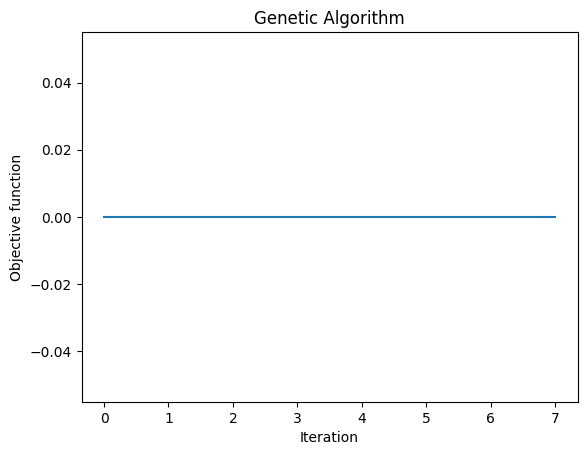


Optimal Feature Thresholds:
V1: 0.44
V2: 0.68
V3: 0.35
V4: 0.00
V5: 0.54
V6: 0.88
V7: 0.08
V8: 0.71
V9: 0.59
V10: 0.41
V11: 0.22
V12: 0.88
V13: 0.76
V14: 0.42
V15: 0.33
V16: 0.82
V17: 0.51
V18: 0.11
V19: 0.52
V20: 0.97
V21: 0.89
V22: 0.06
V23: 0.96
V24: 0.66
V25: 0.66
V26: 0.77
V27: 0.67
V28: 0.38
Amount: 0.91


In [58]:
from geneticalgorithm import geneticalgorithm as ga
import numpy as np

# Define number of features
num_features = X_train.shape[1]

# Define the variable boundaries and types (thresholds for each feature between 0 and 1)
var_boundaries = np.array([[0, 1]] * num_features)  # Thresholds for each feature

# Define the variable types as NumPy array of tuples (we use 'float' for threshold values)
# var_types = np.array([('float', [0, 1])] * num_features, dtype=object) # this is incorrect
#var_types = np.array([('float', [0, 1]) for i in range(num_features)], dtype=object)
var_types = np.array(['real' for i in range(num_features)], dtype=object)

# Configure GA parameters
algorithm_params = {
    'max_num_iteration': 20,  # Number of generations
    'population_size': 10,  # Number of individuals per generation
    'mutation_probability': 0.2,  
    'elit_ratio': 0.1,  
    'crossover_probability': 0.5,  
    'parents_portion': 0.3,  
    'crossover_type': 'uniform',  
    'max_iteration_without_improv': 5  
}

# Define the GA optimization model
model = ga(
    function=fitness_function,
    dimension=num_features,  # Number of features
    variable_type_mixed=var_types,  # Use NumPy array for variable types
    variable_boundaries=var_boundaries,  # Thresholds for each feature
    algorithm_parameters=algorithm_params
)

# Run GA optimization
model.run()

# Get the best thresholds (optimal solution)
best_thresholds = model.output_dict['variable']

# Print the optimal thresholds for each feature
print("\nOptimal Feature Thresholds:")
for feature, threshold in zip(X_train.columns, best_thresholds):
    print(f"{feature}: {threshold:.2f}")